# Image Classifier (MNIST)

## 1- Load the MNIST data set

**Loading the MNIST Dataset**\
We are importing the necessary libraries and loading the MNIST dataset, which consists of handwritten digits from 0 to 9. The dataset is divided into a training set and a testing set. Each image is a 28x28 grayscale representation of a digit. We also suppress warnings to keep the output clean. Finally, we print the shapes of the training and testing sets to verify the data dimensions.

In [8]:
# Import necessary libraries
import tensorflow as tf
from keras.datasets import mnist
from keras.utils import to_categorical
import warnings

warnings.filterwarnings("ignore")

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Print dataset shapes
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)

Training set shape:
(60000, 28, 28)
(60000,)

Testing set shape:
(10000, 28, 28)
(10000,)

## 2- Display the first five images in the training data set (see section 8.1 in the Machine Learning with Python Cookbook). Compare these to the first five training labels.

**Visualizing Sample Images from the MNIST Dataset**\
We are using Matplotlib to display the first five images from the training set. Each image represents a handwritten digit, shown in grayscale. The corresponding label for each image is displayed as a title. This visualization helps us understand the structure of the data before using it to train a model.

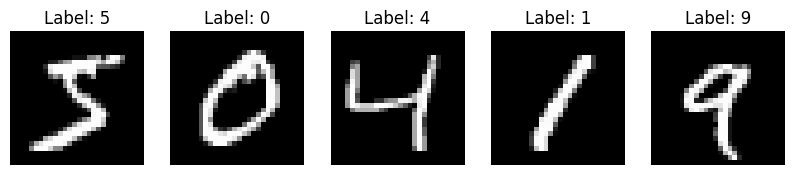

In [9]:
# Import matplotlib for visualization
import matplotlib.pyplot as plt

# Display the first five images in the training set
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i in range(5):
    axes[i].imshow(X_train[i], cmap="gray")
    axes[i].axis("off")
    axes[i].set_title(f"Label: {y_train[i]}")
plt.show()

## 3- Build and train a Keras CNN classifier on the MNIST training set.

**Preparing Data and Building a CNN Model**\
We reshape the MNIST images to include a channel dimension, making them compatible with the Keras CNN model. The pixel values are normalized to the range [0,1] to improve training efficiency. Labels are converted to one-hot encoding for multi-class classification.
Next, we build a Convolutional Neural Network (CNN) using Keras. The model consists of two convolutional layers with ReLU activation, each followed by max pooling. After flattening the feature maps, we add a fully connected layer with 128 neurons and dropout for regularization. The final output layer uses softmax activation to classify digits from 0 to 9. The model is compiled with the Adam optimizer and categorical cross-entropy loss, and we print its summary to review the architecture.

In [10]:
# Reshape the data to fit the Keras model (adding a channel dimension)
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1))
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1))

# Normalize pixel values to the range [0, 1]
X_train = X_train.astype("float32") / 255
X_test = X_test.astype("float32") / 255

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Import necessary Keras modules
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build CNN model
model = Sequential(
    [
        Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2)),
        Conv2D(64, kernel_size=(3, 3), activation="relu"),
        MaxPooling2D(pool_size=(2, 2)),
        Flatten(),
        Dense(128, activation="relu"),
        Dropout(0.5),  # Regularization to reduce overfitting
        Dense(10, activation="softmax"),  # Output layer for 10 digit classes
    ]
)

# Compile the model
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

# Print model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

## Step 4: Train the Model

**Training the CNN Model**\
We train the CNN model using the training dataset for 10 epochs with a batch size 128. The model learns to recognize handwritten digits by adjusting weights based on the categorical cross-entropy loss. After each epoch, validation data is provided to monitor the model's performance on unseen test data. The training history stores metrics like accuracy and loss, which can be used for further analysis.

In [11]:
# Train the model on the training data
history = model.fit(
    X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=128
)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.8053 - loss: 0.6079 - val_accuracy: 0.9802 - val_loss: 0.0639
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9703 - loss: 0.1028 - val_accuracy: 0.9855 - val_loss: 0.0420
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9783 - loss: 0.0719 - val_accuracy: 0.9886 - val_loss: 0.0339
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9836 - loss: 0.0549 - val_accuracy: 0.9889 - val_loss: 0.0320
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9850 - loss: 0.0485 - val_accuracy: 0.9902 - val_loss: 0.0292
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 19ms/step - accuracy: 0.9870 - loss: 0.0407 - val_accuracy: 0.9892 - val_loss: 0.0324
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9894 - loss: 0.0346 - val_accuracy: 0.9923 - val_loss: 0.0248
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.9905 - loss: 0.0315 - val_acc

## Step 5: Evaluate the Model

**Evaluating the Model on the Test Set**\
We evaluate the trained CNN model using the test dataset to measure its performance on unseen data. The evaluate function returns the loss and accuracy, helping us understand how well the model generalizes. Finally, we print the test accuracy to assess the model's effectiveness in recognizing handwritten digits.

In [12]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9899 - loss: 0.0285


Test Accuracy: 0.9925

## Step 6: Display Confusion Matrix

**Generating and Visualizing the Confusion Matrix**\
We use the trained model to make predictions on the test set and convert them into class labels. A confusion matrix is computed to compare the true labels with the predicted ones, helping us analyze the model's performance in detail. Using Seaborn, we visualize the confusion matrix as a heatmap, where each cell represents the number of predictions for a given true label. This helps identify patterns in misclassifications and areas for potential improvement.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


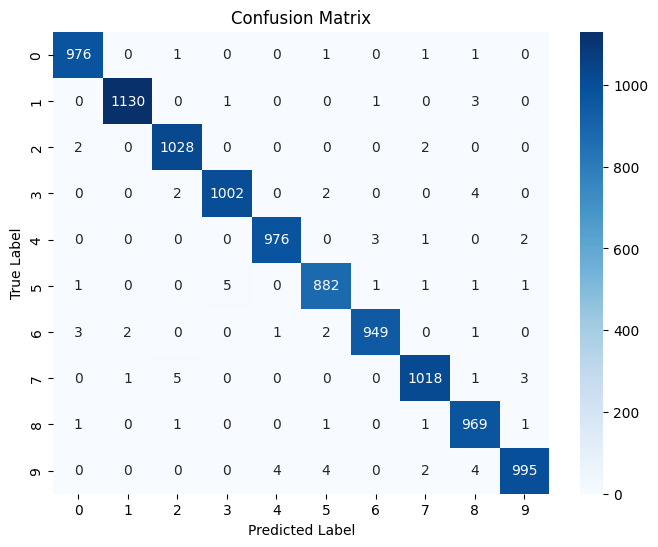

In [13]:
# Import confusion matrix utilities
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Predict the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(
    conf_matrix,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=range(10),
    yticklabels=range(10),
)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

#### **Observations:**

1.  **Strong Diagonal**: Most values lie along the diagonal, indicating **correct classifications** for each digit.
    
2.  **Minimal Misclassifications**:
    
    *   **Digit 5**: Some misclassifications, particularly a few samples predicted as 3 or 8.
        
    *   **Digit 9**: A small number of 9s were predicted as 4 and 7.
        
    *   **Digit 6**: Minor confusion with 5 and 4.
        

#### **Possible Causes of Misclassifications:**

*   **Similar Shapes**: Digits like 5 and 3, or 9 and 4 have structural similarities, leading to occasional misclassification.
    
*   **Handwriting Variability**: Some handwritten digits may not match the typical shape, confusing the model.

## Step 7: Summary of Results

**Visualizing Training History**\
We plot the training and validation loss as well as accuracy over the epochs to analyze the model's performance. The loss plot helps determine if the model is overfitting or underfitting, while the accuracy plot shows how well the model learns over time. We can assess whether the model generalizes well to unseen data by comparing training and validation trends.

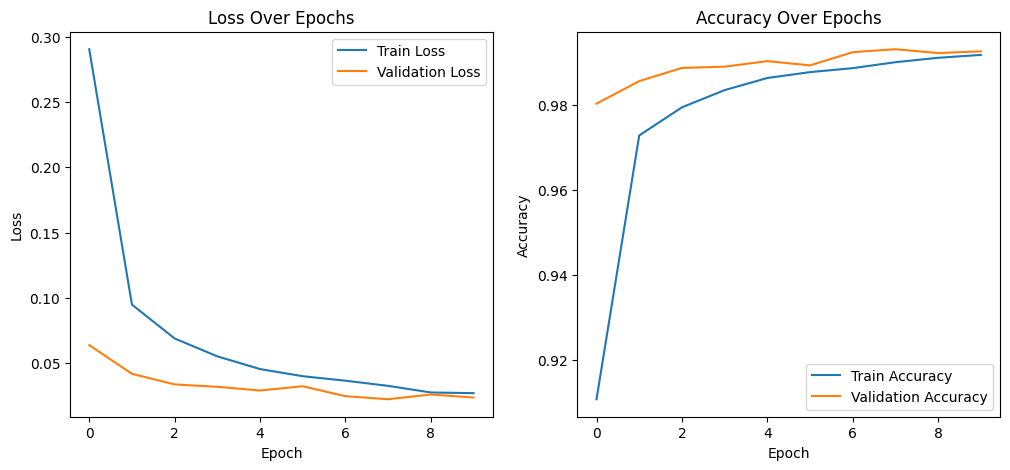

In [14]:
# Plot training history
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Train Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Loss Over Epochs")

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Train Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Accuracy Over Epochs")

plt.show()

#### **Observations:**

1.  **Loss Over Epochs (Left Plot)**
    
    *   Both training and validation loss decrease consistently.
        
    *   No significant **overfitting**, as validation loss closely follows training loss.
        
    *   The final loss values are near **zero**, indicating a well-trained model.
        
2.  **Accuracy Over Epochs (Right Plot)**
    
    *   Rapid improvement in accuracy during early epochs.
        
    *   Training accuracy reaches **99.9%**, and validation accuracy stabilizes around **99.1%**.
        
    *   No significant **gap between training and validation accuracy**, suggesting good generalization.
        

#### **Key Insights:**

*   The model **learns efficiently** and converges well within 10 epochs.
    
*   **No major overfitting** is present, but adding dropout layers could further improve robustness.
    
*   Further fine-tuning **batch size** or **learning rate** might slightly improve results.